# Introduction to Data Science - Homework 7
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, March 9, 11:59pm.

In this homework, you will use classification methods to classify handwritten digits (Part 1) and predict the popularity of online news (Part 2). We hope these exercises will give you an idea of the broad usage of classificaiton methods. 

## Your Data
First Name:Travis
<br>
Last Name:Tiner
<br>
E-mail:u0769566@utah.edu
<br>
UID:u0769566
<br>

In [1]:
# imports and setup 

import pandas as pd
import numpy as np

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Part1: MNIST handwritten digits

THE MNIST handwritten digit dataset consists of images of handwritten digits, together with labels indicating which digit is in each image. You will see that images are just matrices with scalar values, and that we can use all the classifcation algorithms we studied on them.

Becaue both the features and the labels are present in this dataset (and labels for large datasets are generally difficult/expensive to obtain), this dataset is frequently used as a benchmark to compare various classification methods. 
For example, [this webpage](http://yann.lecun.com/exdb/mnist/) gives a comparison of a variety of different classification methods on MNIST (Note that the tests on this website are for higher resolution images than we'll use.) 

In this problem, we'll use scikit-learn to compare classification methods on the MNIST dataset. 

There are several versions of the MNIST dataset. We'll use the one that is built-into scikit-learn, described [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). 

* Classes: 10 (one for each digit)
* Samples total: 1797
* Samples per class: $\approx$180
* Dimensionality: 64 (8 pixels by 8 pixels)
* Features: integers 0-16 (grayscale value; 0 is white, 16 is black)

Here are some examples of the images. Note that the digits have been size-normalized and centered in a fixed-size ($8\times8$ pixels) image.

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png" width="500">

Note that we will scale the data before running them through our algorithms, which will also alter their appearance when we plot them. You can read details about scaling and why it's important [here](http://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling).

In [2]:
digits = load_digits()
X = scale(digits.data)
y = digits.target
print(type(X))

n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
print("n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features))

<class 'numpy.ndarray'>
n_digits: 10, n_samples 1797, n_features 64


In [3]:
# this is what one digit (a zero) looks like
print("===\nThe raw data")
print(digits.images[0])
print("===\nThe scaled data")
print(X[0])
print("===\nThe digit")
print(digits.target[0])

===
The raw data
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]
===
The scaled data
[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
 -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
  0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
 -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
  1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
 -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
  0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
 -0.03543326  0.74211893  1.1506521

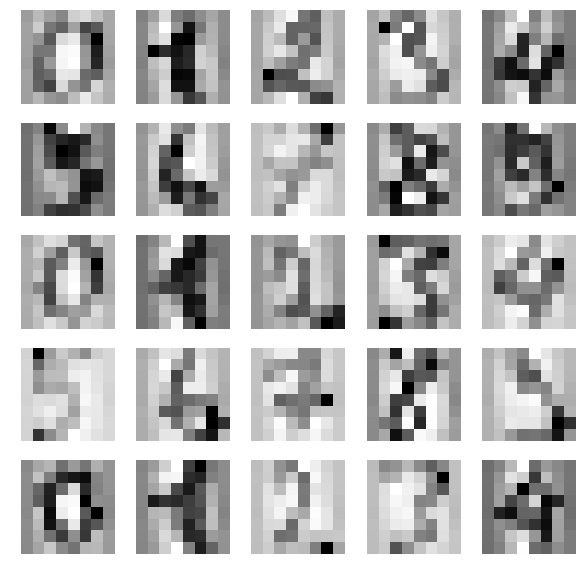

In [4]:
plt.figure(figsize= (10, 10))    
for ii in np.arange(25):
    plt.subplot(5, 5, ii+1)
    plt.imshow(np.reshape(X[ii,:],(8,8)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
plt.show()

You might find [this webpage](http://scikit-learn.org/stable/tutorial/basic/tutorial.html) helpful. 

### Task 1.1: Classification with Support Vector Machines (SVM)

1. Split the data into a training and test set using the command 
```
train_test_split(X, y, random_state=1, test_size=0.8)
```
+ Use SVM with an `rbf` kernel and parameter `C=100` to build a classifier using the *training dataset*.
+ Using the *test dataset*, evaluate the accuracy of the model. Again using the *test dataset*, compute the confusion matrix. What is the most common mistake that the classifier makes? 
+ Print all of these misclassified digits as images. 
+ Using the 'cross_val_score' function, evaluate the accuracy of the SVM for 100 different values of the parameter C between 1 and 500. What is the best value? 
+ Try to train and test the algorithm on the raw (non-scaled) data. What's your accuracy score?

In [5]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state = 1, test_size=0.8)

In [6]:
model = svm.SVC(kernel='rbf',C=100)
model.fit(XTrain, yTrain)
expected = yTest
predicted = model.predict(XTest)
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_true = expected, y_pred = predicted))

print('Accuracy = ', metrics.accuracy_score(y_true = expected, y_pred = predicted))

Confusion Matrix:
[[130   0   0   0   0   0   0   0   0   0]
 [  0 140   4   0   0   0   0   1   4   0]
 [  0   1 134   0   0   0   0   2   5   0]
 [  0   0   3 136   0   0   0   3   4   1]
 [  0   0   0   0 140   0   0  12   0   0]
 [  0   0   0   0   0 141   1   0   1   4]
 [  0   1   0   0   0   0 144   0   1   0]
 [  0   0   0   0   0   0   0 139   0   1]
 [  0   4   0   1   0   1   0   1 126   0]
 [  0   2   0   2   0   3   1   2   2 140]]
Accuracy =  0.952712100139


We get an accuracy of .9527. It looks like the most errors occur on the numbers 7, 8, and 9.

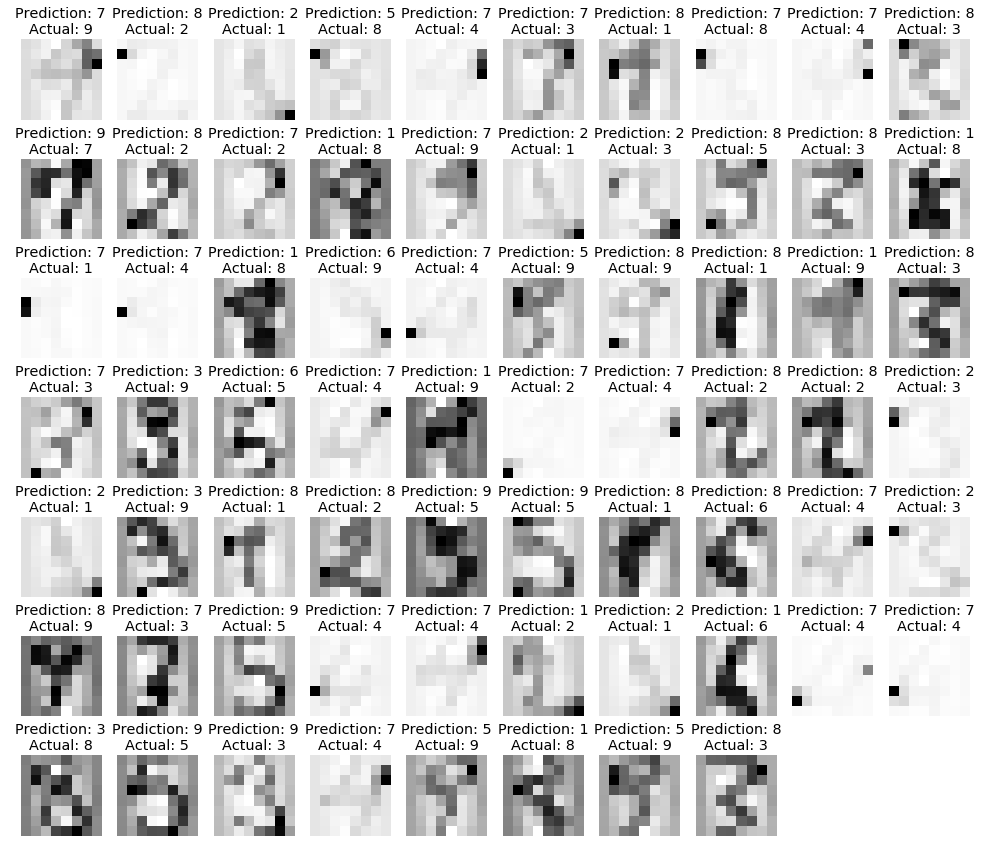

In [7]:
plt.rcParams['figure.figsize'] = (17, 15)
j = 1
prediction = model.predict(XTest)
for i in np.arange(len(XTest)):
    if yTest[i] != prediction[i]:
        plt.subplot(7,10,j)
        plt.imshow(np.reshape(XTest[i],(8,8)), cmap='Greys',interpolation='nearest')
        j+=1
        plt.axis('off')
        title = "Prediction: " + str(prediction[i])+ "\nActual: " + str(yTest[i])
        plt.title(title)
plt.show()

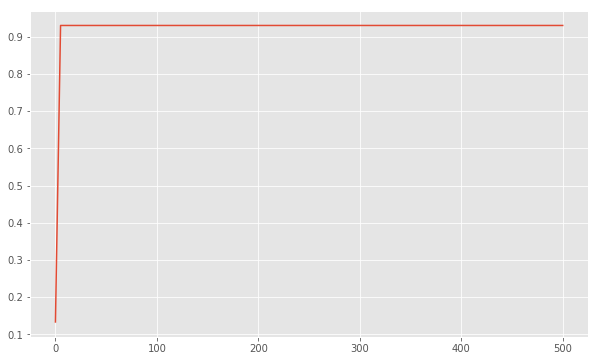

In [8]:
plt.rcParams['figure.figsize'] = (10, 6)
model.get_params()

Cs = np.linspace(.01,500,100)
Accuracies = np.zeros(Cs.shape[0])
for i,C in enumerate(Cs): 
    model = svm.SVC(kernel='rbf', C = C)
    scores = cross_val_score(estimator = model, X = XTrain, y = yTrain, cv=5, scoring='accuracy')    
    Accuracies[i]  = scores.mean()
        
plt.plot(Cs,Accuracies)
plt.show()

In [9]:
X = digits.data
y = digits.target
XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state = 1, test_size=0.8)
model = svm.SVC(kernel='rbf',C=100)
model.fit(XTrain, yTrain)
expected = yTest
predicted = model.predict(XTest)
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_true = expected, y_pred = predicted))

print('Accuracy = ', metrics.accuracy_score(y_true = expected, y_pred = predicted))

Confusion Matrix:
[[130   0   0   0   0   0   0   0   0   0]
 [131  18   0   0   0   0   0   0   0   0]
 [140   0   2   0   0   0   0   0   0   0]
 [147   0   0   0   0   0   0   0   0   0]
 [152   0   0   0   0   0   0   0   0   0]
 [147   0   0   0   0   0   0   0   0   0]
 [139   0   0   0   0   0   7   0   0   0]
 [128   0   0   0   0   0   0  12   0   0]
 [132   0   0   0   0   0   0   0   1   0]
 [152   0   0   0   0   0   0   0   0   0]]
Accuracy =  0.118219749652


With the unscaled data, my accuracy score is 0.1182197. This is not nearly as good as the scaled data. It appears that we predicted that almost all of them were 0.

**Your Interpretation**: TODO

### Task 1.2: Prediction with k-nearest neighbors
Repeat task 1.1 using k-nearest neighbors (k-NN). In part 1, use k=10. In part 3, find the best value of k. 

In [10]:
X = scale(digits.data)
y = digits.target
k = 10

XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state = 1, test_size=0.8)
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(XTrain, yTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [11]:
print('Confusion Matrix:')
Expected = yTest
Prediction = clf.predict(XTest)
print(metrics.confusion_matrix(y_true = Expected, y_pred = Prediction))

print('Accuracy = ', metrics.accuracy_score(y_true = Expected, y_pred = Prediction))

Confusion Matrix:
[[130   0   0   0   0   0   0   0   0   0]
 [  0 137  11   0   0   0   0   0   1   0]
 [  2   4 123   2   0   0   0   2   9   0]
 [  1   0   1 133   0   1   0   6   4   1]
 [  0   0   0   0 147   0   0   4   1   0]
 [  1   1   0   2   1 136   1   0   0   5]
 [  0   2   0   0   0   0 143   0   1   0]
 [  0   0   0   0   0   0   0 139   1   0]
 [  0   9   1   6   0   0   0   1 115   1]
 [  5  10   0   5   1   3   2   9   8 109]]
Accuracy =  0.912378303199


This time I got an accuracy of .9123. This isn't as good as SVM, but still isn't bad. Once again, the numbers that were frequently mis-classified were 7, 8, and 9.

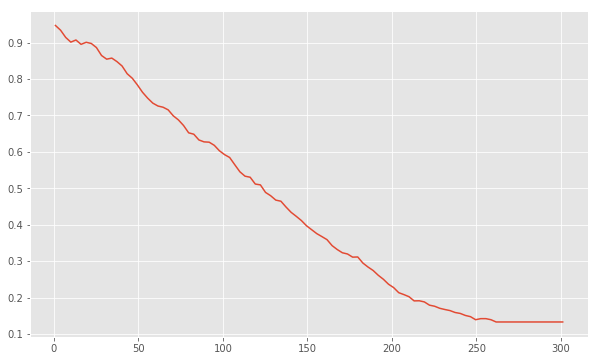

In [12]:
clf.get_params()

Ks = np.linspace(1,301,100)
Accuracies = np.zeros(Ks.shape[0])
for i,K in enumerate(Ks): 
    clf = KNeighborsClassifier(n_neighbors=int(K))
    scores = cross_val_score(estimator = clf, X = XTrain, y = yTrain, cv=10, scoring='accuracy')    
    Accuracies[i]  = scores.mean()
        
plt.plot(Ks,Accuracies)
plt.show()

We would want to to choose k to be 1.

In [13]:
#Unscaled data
X = digits.data
y = digits.target
XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state = 1, test_size=0.8)
k=10
model = KNeighborsClassifier(n_neighbors=k)
model.fit(XTrain, yTrain)
expected = yTest
predicted = model.predict(XTest)
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_true = expected, y_pred = predicted))

print('Accuracy = ', metrics.accuracy_score(y_true = expected, y_pred = predicted))

Confusion Matrix:
[[130   0   0   0   0   0   0   0   0   0]
 [  0 146   0   1   1   1   0   0   0   0]
 [  2   3 128   0   0   0   0   2   7   0]
 [  0   0   0 135   0   2   0   6   3   1]
 [  0   0   0   0 150   0   0   2   0   0]
 [  0   0   0   3   1 139   1   0   0   3]
 [  0   1   0   0   0   0 144   0   1   0]
 [  0   0   0   0   0   0   0 140   0   0]
 [  0   6   2   4   0   1   0   1 117   2]
 [  2   8   0   6   0   3   0   9   3 121]]
Accuracy =  0.938803894298


Without scaling the data, I got an accuracy of .9388, which is better than when it was scaled with the same k value. I'm not sure how to interpret that.

**Your Interpretation**: TODO

# Part 2: Popularity of online news

For this problem, you will use classification tools to predict the popularity of online news based on attributes such as the length of the article, the number of images, the day of the week that the article was published, and some variables related to the content of the article. You can learn details about the datasetat the
[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity). 
This dataset was first used in the following conference paper: 

K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. *Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence* (2015).

The dataset contains variables describing 39,644 articles published between January 7, 2013 and Januyary 7, 2015 on the news website, [Mashable](http://mashable.com/). 
There are 61 variables associated with each article. Of these, 58 are *predictor* variables, 2 are variables that we will not use (url and timedelta), and finally the number of shares of each article. The number of shares is what we will use to define whether or not the article was *popular*, which is what we will try to predict. You should read about the predictor variables in the file *OnlineNewsPopularity.names*. Further details about the collection and processing of the articles can be found in the conference paper. 


### Task 2.1 Import the data 
* Use the pandas.read_csv() function to import the dataset.
* To us[scikit-learn](http://scikit-learn.org), we'll need to save the data as a numpy array. Use the *DataFrame.as_matrix()* command to export the predictor variables as a numpy array called *X* this array should not include our target variable (the number of shares). We don't need the url and timedelta, so let's drop these columns. 
* Export the number of shares as a separate numpy array, called *shares*. We'll define an article to be popular if it received more shares than the median number of shares. Create a binary numpy array, *y*, which indicates whether or not each article is popular.

In [14]:
news = pd.read_csv('OnlineNewsPopularity.csv')
news = news.drop(['url',' timedelta'],axis=1)
predictors = news.drop([' shares'],axis=1)
shares = news[[' shares']]

In [15]:
shares = shares.as_matrix()

In [16]:
predictors = predictors.as_matrix()

In [17]:
y = []
for x in shares:
    if x > np.median(shares):
        y.append(1)
    else: y.append(0)


### Task 2.2 Exploratory data analysis 

First check to see if the values are reasonable. What are the min, median, and maximum number of shares? 

In [18]:
print(np.median(shares))
print(np.min(shares))
print(np.max(shares))

1400.0
1
843300


These are definitely reasonable values.

### Task 2.3 Classification using k-NN

Develop a k-NN classification model for the data. Use cross validation to choose the best value of k. What is the best accuracy you can obtain on the test data? 

In [19]:
X = predictors
k = 19

XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state = 1, test_size=0.8)
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(XTrain, yTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=19, p=2,
           weights='uniform')

In [20]:
print('Confusion Matrix:')
Expected = yTest
Prediction = clf.predict(XTest)
print(metrics.confusion_matrix(y_true = Expected, y_pred = Prediction))

print('Accuracy = ', metrics.accuracy_score(y_true = Expected, y_pred = Prediction))

Confusion Matrix:
[[10246  5725]
 [ 8156  7589]]
Accuracy =  0.562334468407


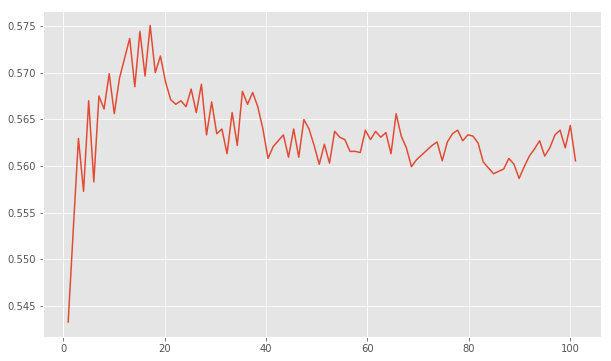

In [21]:
clf.get_params()

Ks = np.linspace(1,101,100)
Accuracies = np.zeros(Ks.shape[0])
for i,K in enumerate(Ks): 
    clf = KNeighborsClassifier(n_neighbors=int(K))
    scores = cross_val_score(estimator = clf, X = XTrain, y = yTrain, cv=5, scoring='accuracy')    
    Accuracies[i]  = scores.mean()
        
plt.plot(Ks,Accuracies)
plt.show()

From this graph, it looked like my best k value would occur just under 20. I was able to get an accuracy of .56233 when k was equal to 19.

**Interpretation:** TODO

### Task 2.4 Classification using SVM

Develop a support vector machine classification model for the data. 
 
 * SVM is computationally expensive, so start by using only a fraction of the data, say 5,000 articles. 
 * Experimt with different Cs. Which is the best value for C?

Note that it takes multiple minutes to run on the whole dataset.

In [22]:
#Looking at first 5000
X = predictors[:5000]
y_sub = y[:5000]

In [23]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y_sub, random_state = 1, test_size=0.8)

In [24]:
model = svm.SVC(kernel='rbf',C=500)
model.fit(XTrain, yTrain)
expected = yTest
predicted = model.predict(XTest)
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_true = expected, y_pred = predicted))

print('Accuracy = ', metrics.accuracy_score(y_true = expected, y_pred = predicted))

Confusion Matrix:
[[   2 1751]
 [   2 2245]]
Accuracy =  0.56175


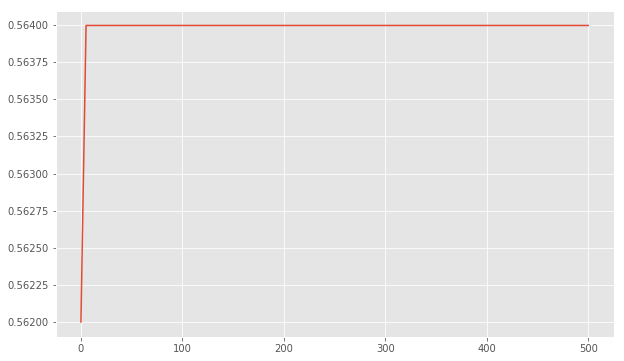

In [25]:
model.get_params()

Cs = np.linspace(.01,500,100)
Accuracies = np.zeros(Cs.shape[0])
for i,C in enumerate(Cs): 
    model = svm.SVC(kernel='rbf', C = C)
    scores = cross_val_score(estimator = model, X = XTrain, y = yTrain, cv=5, scoring='accuracy')    
    Accuracies[i]  = scores.mean()
        
plt.plot(Cs,Accuracies)
plt.show()

We see that the C value doesn't affect our model.

In [26]:
#Doing the whole dataset. This will take longer.
X = predictors

In [27]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state = 1, test_size=0.8)

In [28]:
model = svm.SVC(kernel='rbf',C=500)
model.fit(XTrain, yTrain)
expected = yTest
predicted = model.predict(XTest)
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_true = expected, y_pred = predicted))

print('Accuracy = ', metrics.accuracy_score(y_true = expected, y_pred = predicted))

Confusion Matrix:
[[15971     0]
 [15745     0]]
Accuracy =  0.503562870475


It appears that our model is just predicting that they are either all popular articles or all not popular articles. This model is not effective at all.

### Task 2.5 Classification using decision trees

Develop a decision tree classification model for the data. 

Use cross validation to choose good values of the max tree depth (*max_depth*) and minimum samples split (*min_samples_split*). 

In [29]:
decisionTree = tree.DecisionTreeClassifier(max_depth=3)
decisionTree = decisionTree.fit(XTrain, yTrain)

y_pred_train = decisionTree.predict(XTrain)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))

y_pred = decisionTree.predict(XTest)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_true = yTest, y_pred = y_pred))

print('Accuracy = ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

Accuracy on training data=  0.631306760848
Accuracy on test data=  0.625078824568
Confusion Matrix:
[[10382  5589]
 [ 6302  9443]]
Accuracy =  0.625078824568


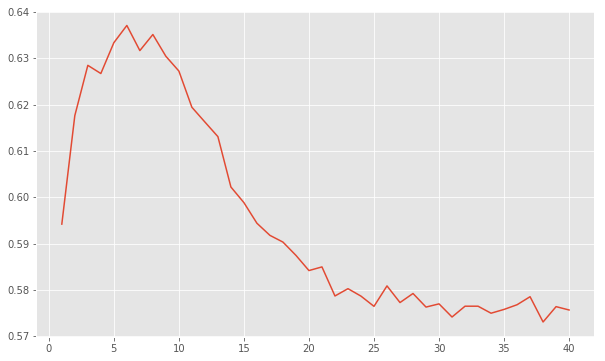

In [30]:
decisionTree.get_params()

Ks = np.linspace(1,40,40)
Accuracies = np.zeros(Ks.shape[0])
for i,K in enumerate(Ks): 
    decisionTree = tree.DecisionTreeClassifier(max_depth=int(K))
    scores = cross_val_score(estimator = decisionTree, X = XTest, y = yTest, cv=5, scoring='accuracy')    
    Accuracies[i]  = scores.mean()
        
plt.plot(Ks,Accuracies)
plt.show()

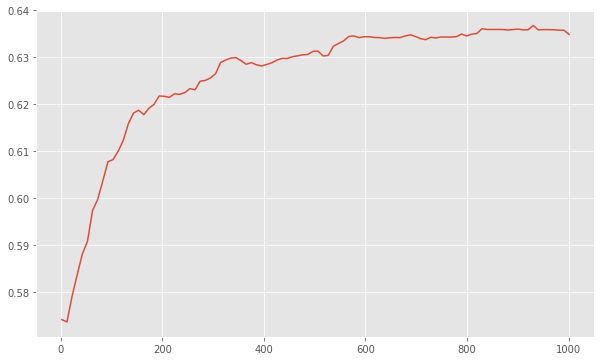

In [31]:
decisionTree.get_params()

Ks = np.linspace(2,1001,100)
Accuracies = np.zeros(Ks.shape[0])
for i,K in enumerate(Ks): 
    decisionTree = tree.DecisionTreeClassifier(min_samples_split=int(K))
    scores = cross_val_score(estimator = decisionTree, X = XTest, y = yTest, cv=5, scoring='accuracy')    
    Accuracies[i]  = scores.mean()
        
plt.plot(Ks,Accuracies)
plt.show()

In [32]:
decisionTree = tree.DecisionTreeClassifier(max_depth=8,min_samples_split=500)
decisionTree = decisionTree.fit(XTrain, yTrain)

y_pred_train = decisionTree.predict(XTrain)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))

y_pred = decisionTree.predict(XTest)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_true = yTest, y_pred = y_pred))

print('Accuracy = ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

Accuracy on training data=  0.661074672048
Accuracy on test data=  0.631637028629
Confusion Matrix:
[[10498  5473]
 [ 6210  9535]]
Accuracy =  0.631637028629


After playing with the max_depth and min_samples_split, I was able to get an accuracy of .63163 on my test data. This happened when max_depth=8 and min_samples_split=500.

### Task 2.6 Describe your findings
1. Which method (k-NN, SVM, Decision Tree) worked best?
+ How did different parameters influence the accuracy?
+ Which model is easiest do interpret?
+ How would you interpret your results?


**Your Solution:** TODO

1. Decision Trees was the best method
2. Parameters
    + for decision trees, higher splits had a positive effect, topping out at about 500. Also, the max depth peaked at around 8.
    + for SVM, C didn't have a noticeable effect. It wasn't a very effective method at all.
    + For k-NN, a k of 19 performed best.
3. Decision trees are easy to interpret to me.
4. We weren't able to get a very high accuracy for predicting newspaper articles. The highest accuracy we achieved was .63163

** Reference Solution:** 

1. Decision trees work the best was better than KNN
+ Parameters
    + For decision trees, higher splits had a positive effect, topping out at about 400.
    + For SVM, C didn't have a noticable effect. It performed poorly anyways and takes very long.
    + For k-NN a k of 50 perfomed best.
+ k-NN and decision trees are easy to interpret.
+ The accuracy of predicting popularity of newspaper articles using just those features is not very high; a chance pick would have an accuracy of 0.5.